<a href="https://colab.research.google.com/github/KanishkaAnbudurai/My-Projects/blob/main/Facial_Emotion_Recognition_System_(Happy_or_Unhappy)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Emotion Recognition System (Happy or Unhappy)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import Image

Mounted at /content/drive
[Errno 20] Not a directory: '/content/drive/MyDrive/DL/train/happy/pic1.jpg'
/content


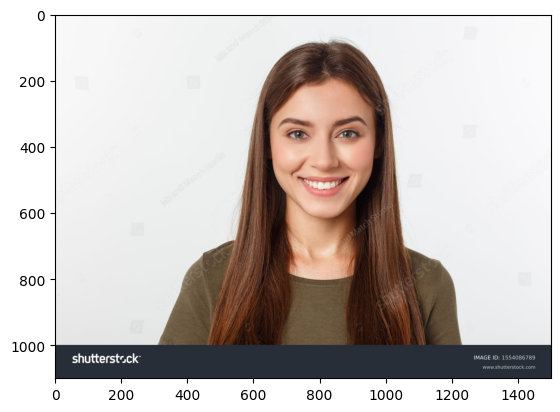

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing import image

drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/DL/train/happy/pic1.jpg

img = image.load_img("/content/drive/MyDrive/DL/train/happy/pic1.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/DL/train/happy/pic1.jpg")

array([[[247, 247, 247],
        [245, 245, 245],
        [244, 244, 244],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[247, 247, 247],
        [246, 246, 246],
        [245, 245, 245],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[248, 248, 248],
        [247, 247, 247],
        [246, 246, 246],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]],

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]],

       [[ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39],
        ...,
        [ 56,  46,  39],
        [ 56,  46,  39],
        [ 56,  46,  39]]

In [ ]:
cv2.imread("/content/drive/MyDrive/DL/train/happy/pic1.jpg").shape

(1100, 1500, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/DL/train/',
                                          target_size= (400,400),
                                          batch_size= 3,
                                          class_mode= 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/DL/valid/',
                                          target_size= (400,400),
                                          batch_size= 3,
                                          class_mode= 'binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

In [ ]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape =(400,400,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                    tf.keras.layers. MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation= 'relu'),

                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs=20,
                      validation_data= validation_dataset)

Epoch 1/20
5/5 [==============================] - 17s 3s/step - loss: 15.5059 - accuracy: 0.2667 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 0.9676 - accuracy: 0.4000 - val_loss: 0.6569 - val_accuracy: 0.5500
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.6739 - accuracy: 0.7857 - val_loss: 0.5382 - val_accuracy: 0.7500
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 1.3467 - accuracy: 0.5714 - val_loss: 0.4802 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.5374 - accuracy: 0.7333 - val_loss: 0.4213 - val_accuracy: 0.7000
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.4814 - accuracy: 0.9286 - val_loss: 0.2613 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.2954 - accuracy: 0.8571 - val_loss: 0.2430 - val_accuracy: 0.9500
Epoch 8/20
5/5 [=======================

In [ ]:
dir_path = '/content/drive/MyDrive/DL/test/'

for i in os.listdir(dir_path ):
  print(i)

pic3.jpg
pic4.jpg
pic1.jpg
pic5.jpg
pic6.jpg
pic7.jpg
pic8.jpg
pic2.jpg


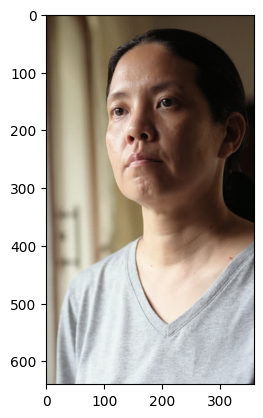

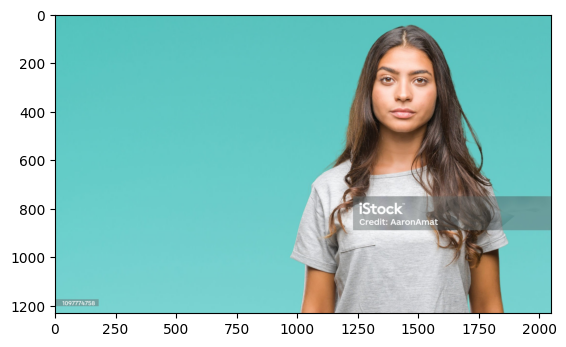

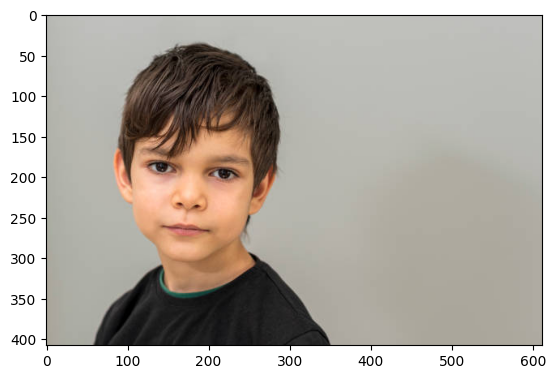

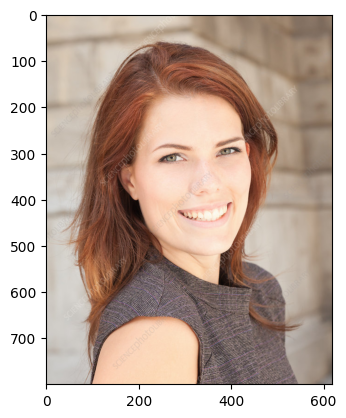

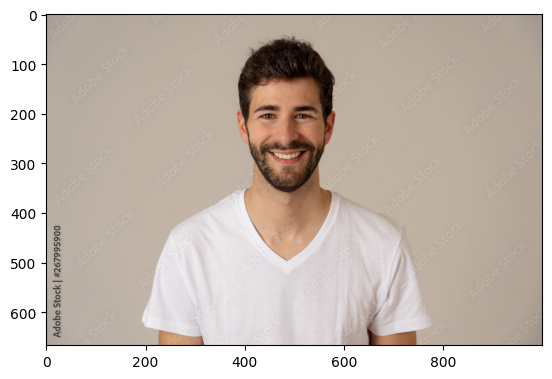

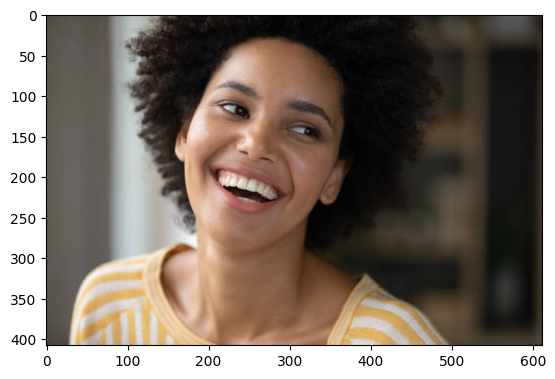

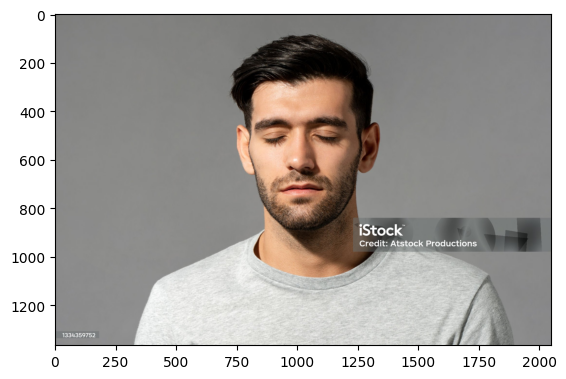

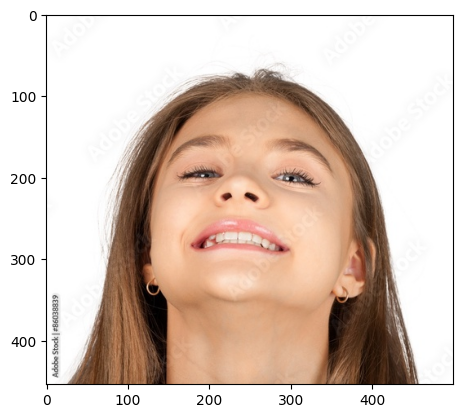

In [ ]:
for i in os.listdir(dir_path ):
  img=image.load_img(dir_path+'//'+ i)
  plt.imshow(img)
  plt.show()

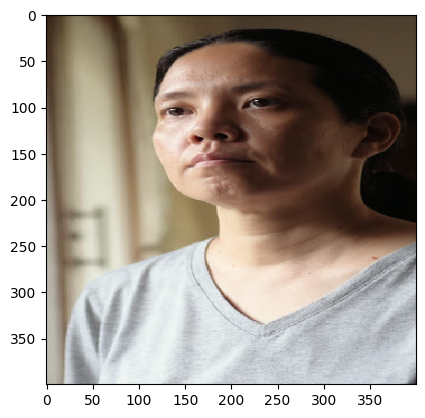

1/1 [==============================] - 0s 58ms/step
You are HAPPY😁


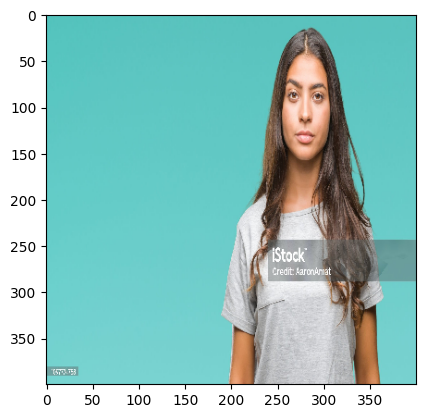

1/1 [==============================] - 0s 57ms/step
You are SAD🙁


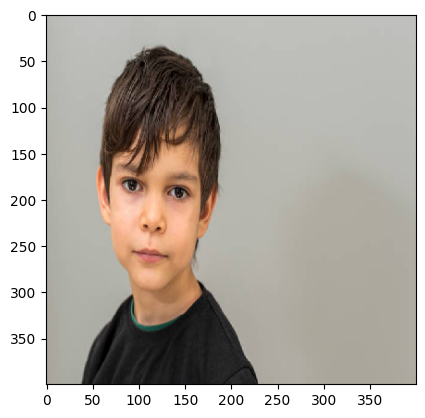

1/1 [==============================] - 0s 56ms/step
You are HAPPY😁


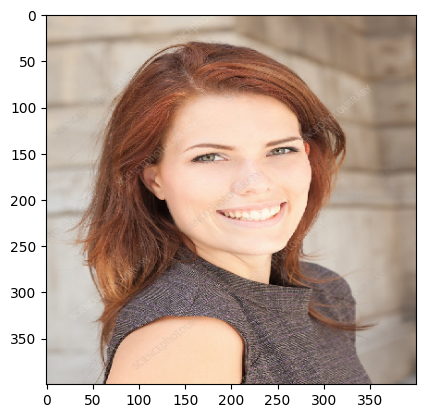

1/1 [==============================] - 0s 68ms/step
You are HAPPY😁


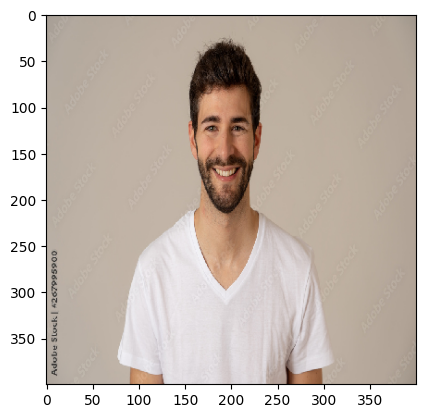

1/1 [==============================] - 0s 67ms/step
You are HAPPY😁


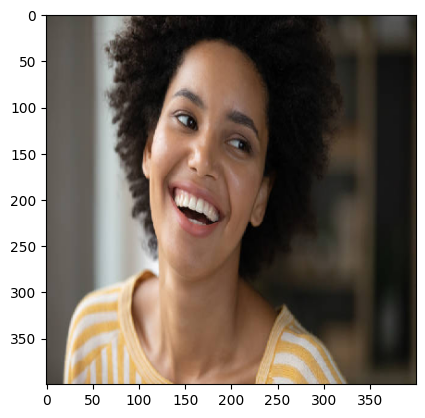

1/1 [==============================] - 0s 65ms/step
You are HAPPY😁


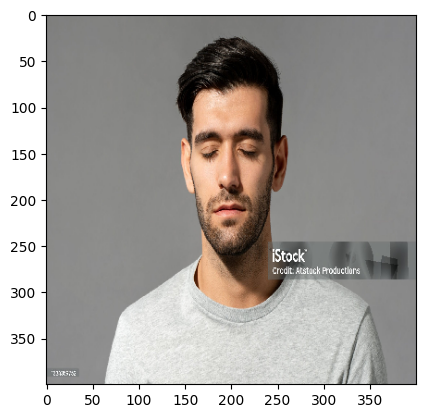

1/1 [==============================] - 0s 69ms/step
You are SAD🙁


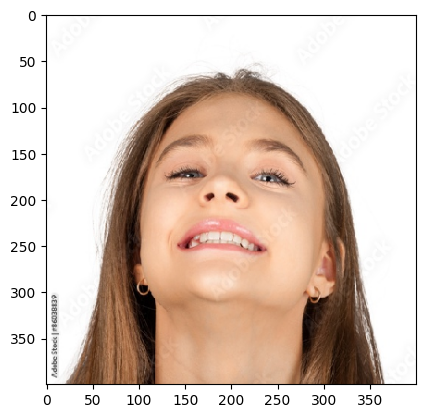

1/1 [==============================] - 0s 65ms/step
You are HAPPY😁


In [ ]:
for i in os.listdir(dir_path ):
  img=image.load_img(dir_path+'//'+ i, target_size= (400,400))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)

  if val == 1:
    print("You are SAD🙁")
  else:
    print("You are HAPPY😁")